<a href="https://colab.research.google.com/github/fitrasaphira/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**


##**Content**




> - Objective
- Import Libary and Datasets
- RFM Analysis
- Kmeans Analysis



## **Steps**

Steps to do Customer Segmentation : 
- Collect data with characteristics that can be clustered (numeric, categorical with treatment)
- Clean the data
- Scaler (MinMaxScaler)
- K-Means analysis with elbow and silhoutte method
- Labelling the model
- Present

## **Objective**

Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget. 

In this case **we already did data cleaning** in my Gustavo-Ecommerce-Analysis repository, so just lets use the cleaned data. 

Link of the data is provided in [Google Docs File](https://docs.google.com/document/d/1LcBE-UdA17RPU8E-zRZbMdNkwUb-Yb4xB9n4GA1SxfM/edit)

## **Data Dictionary**

1. **orders_dataset**, the data have 8 columns which store informations about time and status.
  - **order_id** : 
Unique identifier of the order.
  - **customer_id** : Key to the orders dataset. Each order has a unique customer_id.
  - **order_status** : Reference to the order status (delivered, shipped, etc).
  - **order_purchase_timestamp** : Shows the purchase timestamp.
  - **order_approved_at** : Shows the payment approval timestamp.
  - **order_delivered_carrier_date** : Shows the order posting timestamp. When it was handled to the logistic partner.
  - **order_delivered_customer_date** : 
Shows the actual order delivery date to the customer.
  - **order_estimated_delivery_date** : Shows the estimated delivery date that was informed to customer at the purchase moment.

2. **customers_dataset**, the data have 5 columns which store informations about customer's details.
  - **customer_id** : 
Key to the orders dataset. Each order has a unique customer_id.
  - **customer_unique_id** : 
Unique identifier of the customer.
  - **customer_zip_code_prefix** : 
First five digits of customer zip code.
  - **customer_city** : Customer city name.
  - **customer_state** : Customer state.

3. **order_payment_dataset**, the data have 5 columns which store informations about customer's payment details.
  - **order_id** : Unique identifier of the order.
  - **payment_sequential** : A customer may pay an order with more than one payment method. If they does so, a sequence will be created to accommodate all payments.
  - **payment_type** : Method of payment chosen by the customer.
  - **payment_installments** : Number of installments chosen by the customer.
  - **payment_value** : Transaction value.

# **Import Libary and Datasets**

**Code Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster


In [ ]:
!pip install squarify
import squarify 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandasql
!pip install type_enforced

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=dbd739419368e03bd35fd9907ce1f9b696eb30c95774f31c701274bb94ae9ebb
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for type-enforced: filename=type_enforced-0.0.5-py3-none-any.whl size=3914 sha256=1831e5b481df952b73609de76de2229314457316100ff06ad72012a3b9f167f3
  Stored in directory: /root/.cache/pip/wheels/a2/9f/c0/913b702013e3e6c2f3a063e86bed716c4607405e19e6038cb1
Successfully built type-enforced


In [ ]:
!gdown https://drive.google.com/uc?id=1tg2b5IJnTMwkGEAdRgJJsg4M0ir-KOnr

Downloading...
From: https://drive.google.com/uc?id=1tg2b5IJnTMwkGEAdRgJJsg4M0ir-KOnr
To: /content/librfm.py
100% 9.26k/9.26k [00:00<00:00, 8.68MB/s]


In [ ]:
from librfm import RFM

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1XCvTi4tgulFrpYf9SSGVT_2sPuqiif_SZSwqqrxd-n4/edit#gid=2052739549'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,total_payment
0,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-24 16:33:45,2016-11-24,14359ea0c7a105749c0a56478825b015,4849,sao paulo,SP,1,credit_card,2,44.23,44.23
1,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-14 16:08:00,2016-11-23,87776adb449c551e74c13fc34f036105,12030,taubate,SP,1,credit_card,4,40.95,40.95
2,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,2016-10-04 09:59:03,2016-10-04 10:25:46,2016-11-18 08:51:07,2016-11-24,88bc832f104b6dd684a17dbb1b76e778,2993,sao paulo,SP,1,credit_card,1,114.77,114.77
3,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-31 11:07:42,2016-11-23,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,1,credit_card,6,133.46,133.46
4,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98d6a11d5d04d9f2a70aa6c34,2016-10-03 22:51:30,2016-10-04 10:28:19,2016-11-01 15:14:45,2016-11-25,10e89fd8e5c745f81bec101207ba4d7d,35162,ipatinga,MG,1,credit_card,3,92.27,92.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95634,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,2018-08-29 11:06:11,2018-08-29 11:24:02,2018-08-30 23:56:54,2018-09-04,0421e7a23f21e5d54efed456aedbc513,13322,salto,SP,1,credit_card,2,119.42,119.42
95635,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-30 22:48:27,2018-09-03,7a22d14aa3c3599238509ddca4b93b01,5863,sao paulo,SP,1,credit_card,7,73.10,73.10
95636,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-30 16:52:31,2018-09-11,7febafa06d9d8f232a900a2937f04338,38600,paracatu,MG,1,voucher,1,61.29,61.29
95637,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-30 16:36:59,2018-09-03,b701bebbdf478f5500348f03aff62121,9541,sao caetano do sul,SP,1,credit_card,1,33.23,33.23


Check data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95639 entries, 0 to 95638
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       95639 non-null  object 
 1   customer_id                    95639 non-null  object 
 2   order_purchase_timestamp       95639 non-null  object 
 3   order_approved_at              95639 non-null  object 
 4   order_delivered_customer_date  95639 non-null  object 
 5   order_estimated_delivery_date  95639 non-null  object 
 6   customer_unique_id             95639 non-null  object 
 7   customer_zip_code_prefix       95639 non-null  int64  
 8   customer_city                  95639 non-null  object 
 9   customer_state                 95639 non-null  object 
 10  payment_sequential             95639 non-null  int64  
 11  payment_type                   95639 non-null  object 
 12  payment_installments           95639 non-null 

All of the time data is object type, so lets just converted it to datetime format.

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],format='%Y-%m-%d',errors='coerce')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'],format='%Y-%m-%d',errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],format='%Y-%m-%d',errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],format='%Y-%m-%d',errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95639 entries, 0 to 95638
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95639 non-null  object        
 1   customer_id                    95639 non-null  object        
 2   order_purchase_timestamp       95639 non-null  datetime64[ns]
 3   order_approved_at              95639 non-null  datetime64[ns]
 4   order_delivered_customer_date  95639 non-null  datetime64[ns]
 5   order_estimated_delivery_date  95639 non-null  datetime64[ns]
 6   customer_unique_id             95639 non-null  object        
 7   customer_zip_code_prefix       95639 non-null  int64         
 8   customer_city                  95639 non-null  object        
 9   customer_state                 95639 non-null  object        
 10  payment_sequential             95639 non-null  int64         
 11  payment_type   

# **Customer Segmentation**

## **RFM**

**RFM** is one of a popular method to segment customer for personalized / targeted marketing. Comes from Pareto Principles, it helps marketer to focus their effort on 20% customer which generate 80% revenue and give different treatment to different customer behavior.

1. **Recency**: Number of days since last purchase 
2. **Frequency** : The total number of purchases
3. **Monetary** : The average money customer spent




First lets create new variable for **monetary** with order_purchase_timestamp

In [ ]:
last_order = max(df['order_purchase_timestamp'])
df['recency_days'] = (last_order - df['order_purchase_timestamp']).dt.days
df

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,total_payment,recency_days
0,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-24 16:33:45,2016-11-24,14359ea0c7a105749c0a56478825b015,4849,sao paulo,SP,1,credit_card,2,44.23,44.23,694
1,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-14 16:08:00,2016-11-23,87776adb449c551e74c13fc34f036105,12030,taubate,SP,1,credit_card,4,40.95,40.95,694
2,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,2016-10-04 09:59:03,2016-10-04 10:25:46,2016-11-18 08:51:07,2016-11-24,88bc832f104b6dd684a17dbb1b76e778,2993,sao paulo,SP,1,credit_card,1,114.77,114.77,694
3,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-31 11:07:42,2016-11-23,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,1,credit_card,6,133.46,133.46,694
4,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98d6a11d5d04d9f2a70aa6c34,2016-10-03 22:51:30,2016-10-04 10:28:19,2016-11-01 15:14:45,2016-11-25,10e89fd8e5c745f81bec101207ba4d7d,35162,ipatinga,MG,1,credit_card,3,92.27,92.27,694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95634,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,2018-08-29 11:06:11,2018-08-29 11:24:02,2018-08-30 23:56:54,2018-09-04,0421e7a23f21e5d54efed456aedbc513,13322,salto,SP,1,credit_card,2,119.42,119.42,0
95635,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-30 22:48:27,2018-09-03,7a22d14aa3c3599238509ddca4b93b01,5863,sao paulo,SP,1,credit_card,7,73.10,73.10,0
95636,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-30 16:52:31,2018-09-11,7febafa06d9d8f232a900a2937f04338,38600,paracatu,MG,1,voucher,1,61.29,61.29,0
95637,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-30 16:36:59,2018-09-03,b701bebbdf478f5500348f03aff62121,9541,sao caetano do sul,SP,1,credit_card,1,33.23,33.23,0


Create new dataframe to group it by customer_unique_id and add **recency** and **frequency** columns

In [ ]:
df_rfm = df.groupby('customer_unique_id', as_index=False).agg(recency=('recency_days','min'),frequency=('order_id','count'),monetary=('payment_value', 'mean'))
df_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...,...
88668,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32
88669,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
88670,ffff371b4d645b6ecea244b27531430a,567,1,112.46
88671,ffff5962728ec6157033ef9805bacc48,118,1,133.69


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


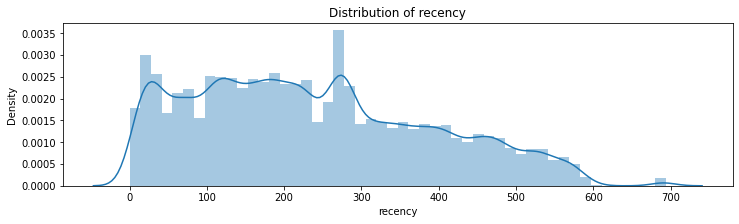

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


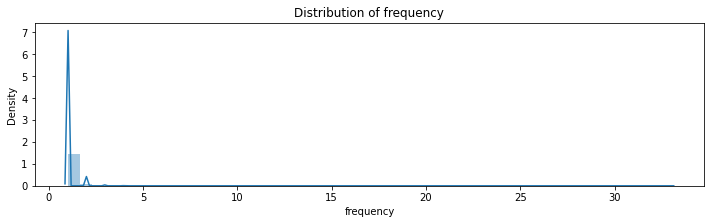

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


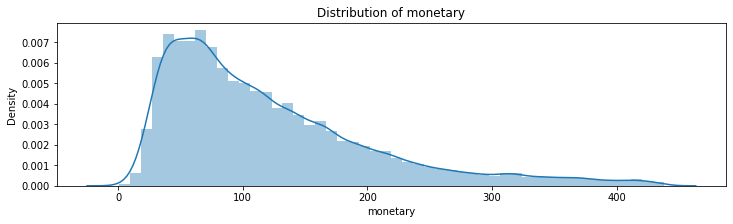

In [ ]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

All of data is right skewed and frequency have data that centered in one value, so lets score each RFM features.

In [ ]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['recency_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype('int')

df_rfm.loc[df_rfm['frequency'] <= 5, 'frequency_score'] = 1
df_rfm.loc[df_rfm['frequency'] > 5, 'frequency_score'] = 2
df_rfm.loc[df_rfm['frequency'] > 10, 'frequency_score'] = 3
df_rfm.loc[df_rfm['frequency'] > 15, 'frequency_score'] = 4
df_rfm.loc[df_rfm['frequency'] > 20, 'frequency_score'] = 5

df_rfm['frequency_score'] = df_rfm['frequency_score'].astype('int')
df_rfm['monetary_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype('int')

df_rfm

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,3
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,5
...,...,...,...,...,...,...,...
88668,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,3,1,4
88669,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3
88670,ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,1,3
88671,ffff5962728ec6157033ef9805bacc48,118,1,133.69,4,1,4


Concatenate all of the scores into a single number

In [ ]:
df_rfm['rfm_score'] = df_rfm['recency_score'].astype('str') + df_rfm['frequency_score'].astype('str') + df_rfm['monetary_score'].astype('str')
df_rfm

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,3,113
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,5,215
...,...,...,...,...,...,...,...,...
88668,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,3,1,4,314
88669,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3,313
88670,ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,1,3,113
88671,ffff5962728ec6157033ef9805bacc48,118,1,133.69,4,1,4,414


Labelling the model by using the given function rfm.label samples().

In [ ]:
rfm = RFM(
    id_colname ='customer_unique_id',
    recency_colname = 'recency', 
    frequency_colname = 'frequency', 
    monetary_colname = 'monetary',
    num_cluster = 5
);

df_rfm_labelled = rfm.label_samples(df_rfm)
df_rfm_labelled

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,3,113,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,5,215,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
...,...,...,...,...,...,...,...,...,...,...,...
88668,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,3,1,4,314,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
88669,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3,313,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
88670,ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,1,3,113,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
88671,ffff5962728ec6157033ef9805bacc48,118,1,133.69,4,1,4,414,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"


Check the segment distribution using recency and monetary

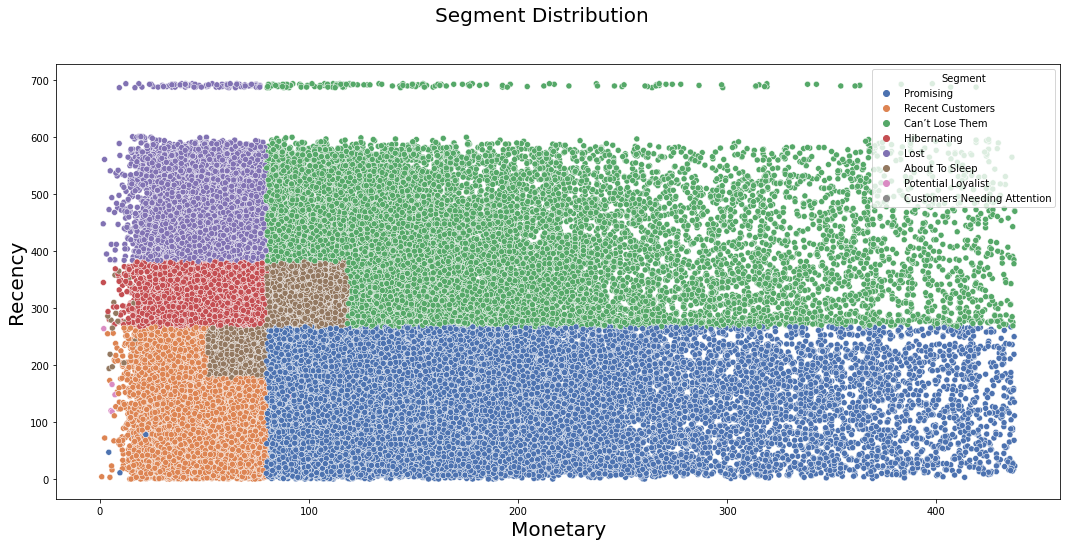

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Segment Distribution', fontsize=20)
plt.xlabel('Monetary', fontsize=20)
plt.ylabel('Recency', fontsize=20)
sns.scatterplot(data=df_rfm_labelled, x="monetary", y="recency", hue="Segment", palette="deep")
plt.show()

Check the total customers and the average value of each RFM in each segment.

In [ ]:
agg_dict = {
    'customer_unique_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}

df_analysis = df_rfm_labelled.groupby('Segment').agg(agg_dict).reset_index()
df_analysis.rename({'Segment': 'label', 'customer_unique_id': 'count'}, axis=1, inplace=True)
df_analysis['count %'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary %'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis.sort_values(by='count', ascending=False, inplace=True)
df_analysis

,label,count,recency,frequency,monetary,count %,monetary %
6,Promising,32489,132.824587,1.052479,166.805918,0.366391,0.224098
7,Recent Customers,17383,116.366968,1.105563,48.023961,0.196035,0.064519
1,Can’t Lose Them,17260,408.924971,1.038818,182.407339,0.194648,0.245058
4,Lost,7376,471.911876,1.159843,50.825082,0.083182,0.068282
3,Hibernating,7232,315.538302,1.116565,52.487106,0.081558,0.070515
0,About To Sleep,6922,268.203265,1.088847,81.854244,0.078062,0.109969
5,Potential Loyalist,8,129.125000,13.375000,26.092282,0.000090,0.035054
2,Customers Needing Attention,3,198.000000,7.666667,135.846713,0.000034,0.182506


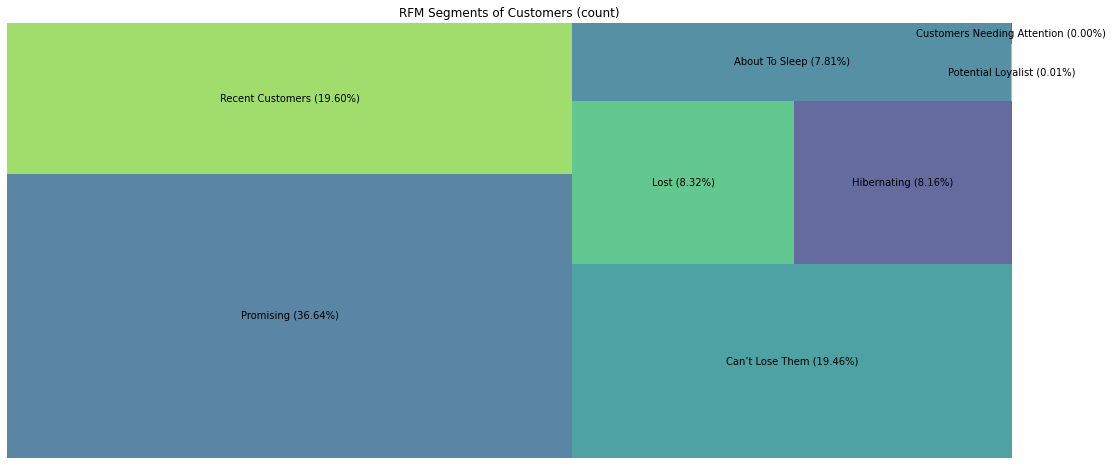

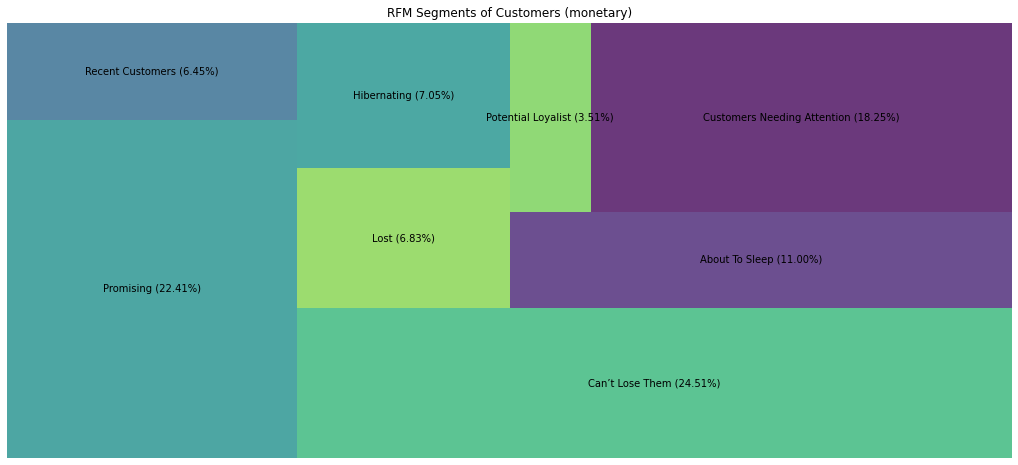

In [ ]:
for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + ' %'].apply(lambda x: ' ({0:.2f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

### **Summary**
> - The majority customer are from **Promising** segment(36.64%)
- Most of the revenue comes from **Can't Lose Them**(25.51%) and **Promising**(22.41%) segment.

### **Recommendation**
> - Always upgrade services and products by asking feedback and recommendations, especially for the **Promising** segment.
- Give product recommendations based on previous purchases and make limited-time offers for the most valuable sector, which is **Can't Lose Them** and **Promising** segment.

## **K-Means**

Step 1 : Determine variable to use in clustering<br>
Step 2 : Determine cluster number with **elbow** and **silhoutte** method<br>
Step 3 : Create cluster<br>
Step 4 : Check agg for each cluster<br>
Step 5 : Naming

Variable that we want to use : 
1. Customer State
2. Total Order
3. Total Customer
4. Payment Installment 
5. Payment Value

In [ ]:
df_cluster = df.groupby('customer_state').agg(total_order=('order_id','count'),total_customer=('customer_unique_id','count'),payment_installments=('payment_installments', 'median'),payment_value=('payment_value', 'median') )
df_cluster

,total_order,total_customer,payment_installments,payment_value
customer_state,,,,
AC,71,71,3.0,139.530
AL,365,365,2.0,124.050
AM,138,138,2.0,101.295
AP,63,63,2.0,135.610
BA,3265,3265,2.0,101.310
CE,1222,1222,2.0,115.885
DF,2023,2023,1.0,100.340
ES,1982,1982,2.0,99.660
GO,1926,1926,2.0,100.820


Because the numeric column have different scale, we need to scale it so all numeric feature have same importance

In [ ]:
numerical_column = ['total_order','total_customer','payment_installments','payment_value']

In [ ]:
scaler = MinMaxScaler()
sc= df_cluster.copy()
sc[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
sc

,total_order,total_customer,payment_installments,payment_value
customer_state,,,,
AC,0.000864,0.000864,1.00,1.000000
AL,0.008123,0.008123,0.50,0.714180
AM,0.002518,0.002518,0.50,0.294036
AP,0.000667,0.000667,0.50,0.927622
BA,0.079722,0.079722,0.50,0.294313
CE,0.029282,0.029282,0.50,0.563423
DF,0.049058,0.049058,0.00,0.276403
ES,0.048046,0.048046,0.50,0.263848
GO,0.046663,0.046663,0.50,0.285266


Lets determine cluster number with **elbow** method first

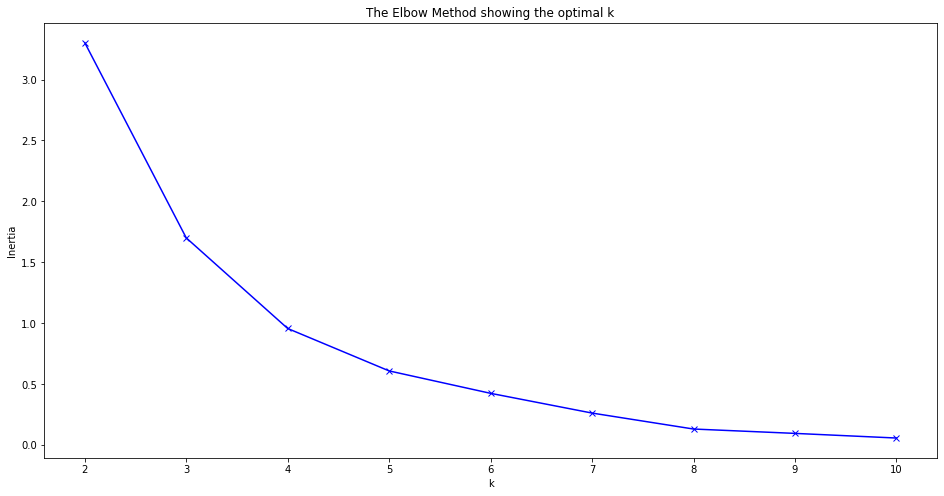

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(sc)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Create a cluster range that make sense for business which from 2 to 10

In [ ]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 3.11MB/s]


In [ ]:
from silhoutte import silhoutte_analysis

For n_clusters = 2 The average silhouette_score is : 0.6712348432517077
For n_clusters = 3 The average silhouette_score is : 0.46365548122016814
For n_clusters = 4 The average silhouette_score is : 0.5121828118145951
For n_clusters = 5 The average silhouette_score is : 0.5193580076652884
For n_clusters = 6 The average silhouette_score is : 0.5215668458836087
For n_clusters = 7 The average silhouette_score is : 0.5884123916904502
For n_clusters = 8 The average silhouette_score is : 0.6010246347659951
For n_clusters = 9 The average silhouette_score is : 0.611540339621014
For n_clusters = 10 The average silhouette_score is : 0.5833935897682098


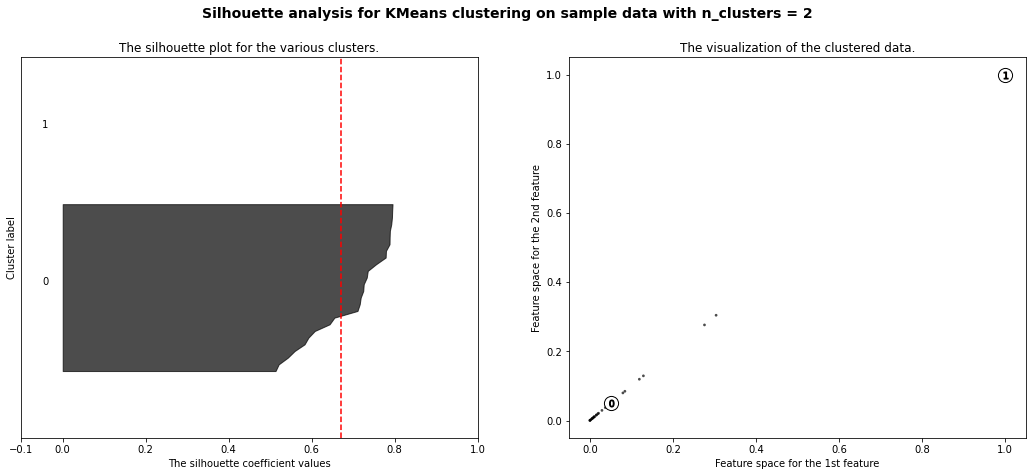

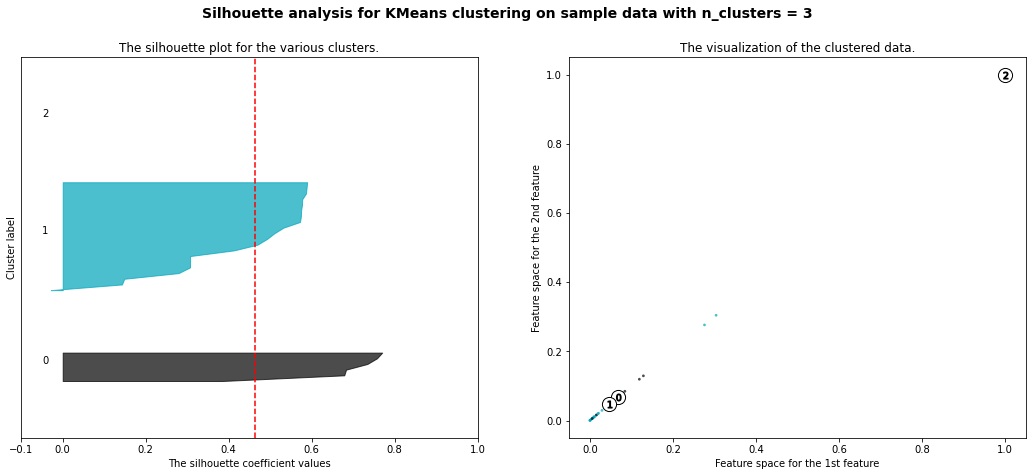

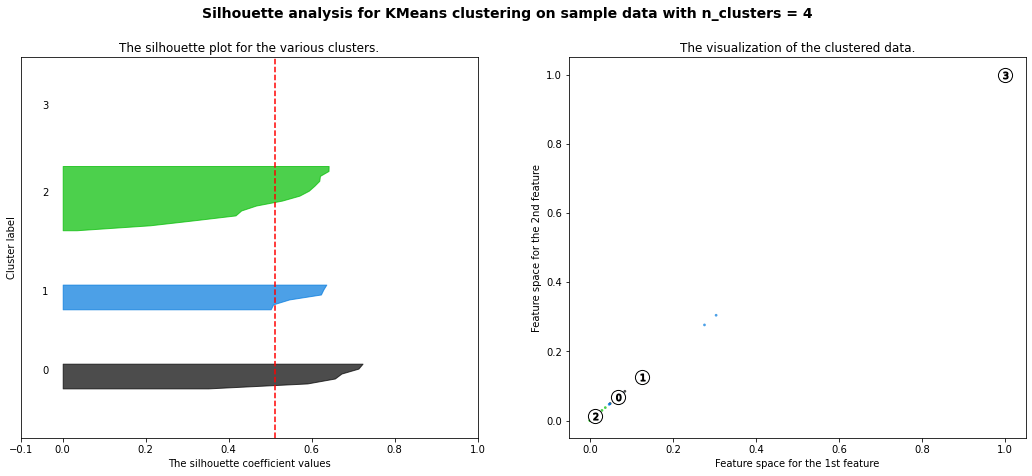

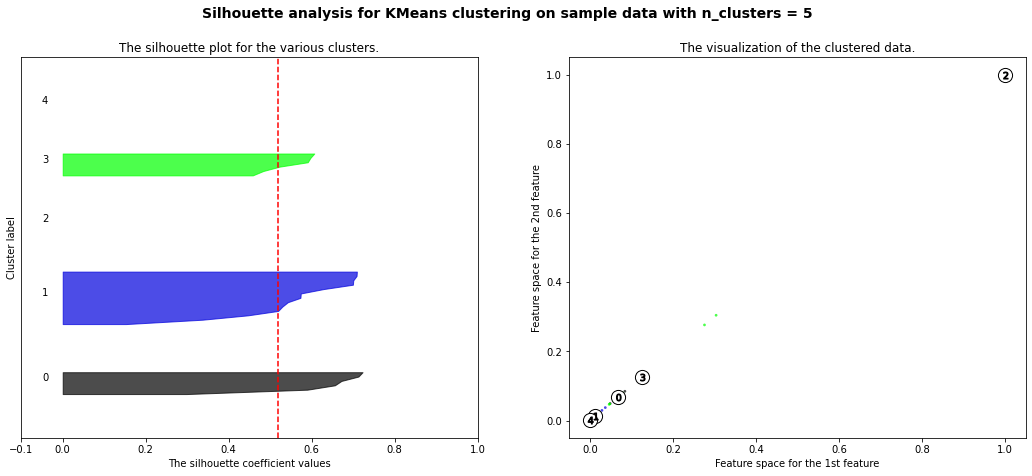

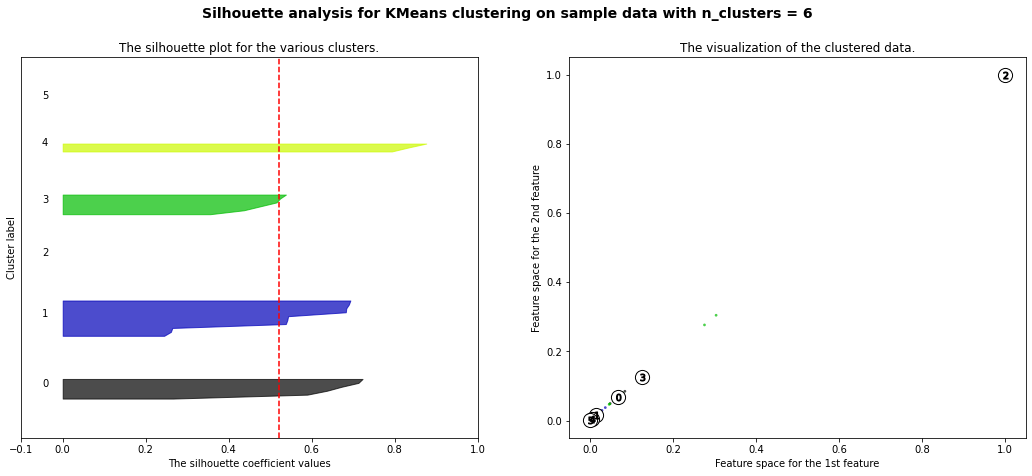

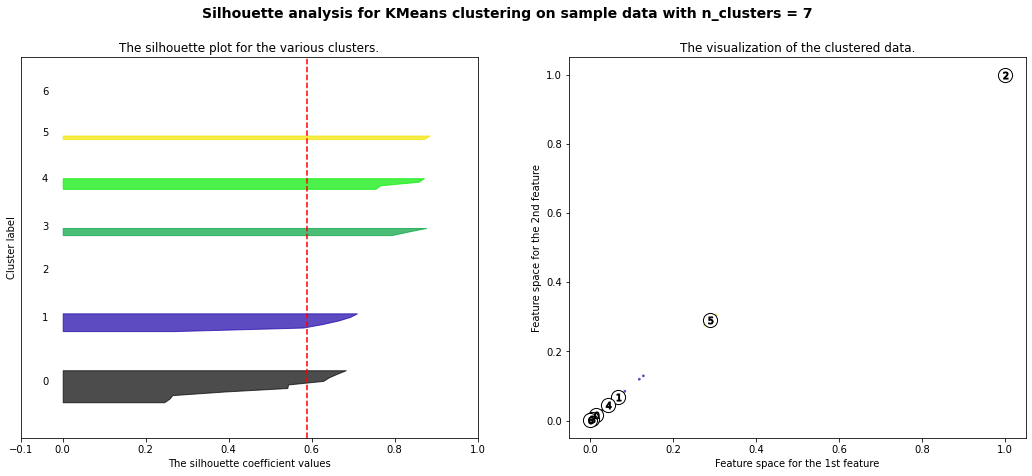

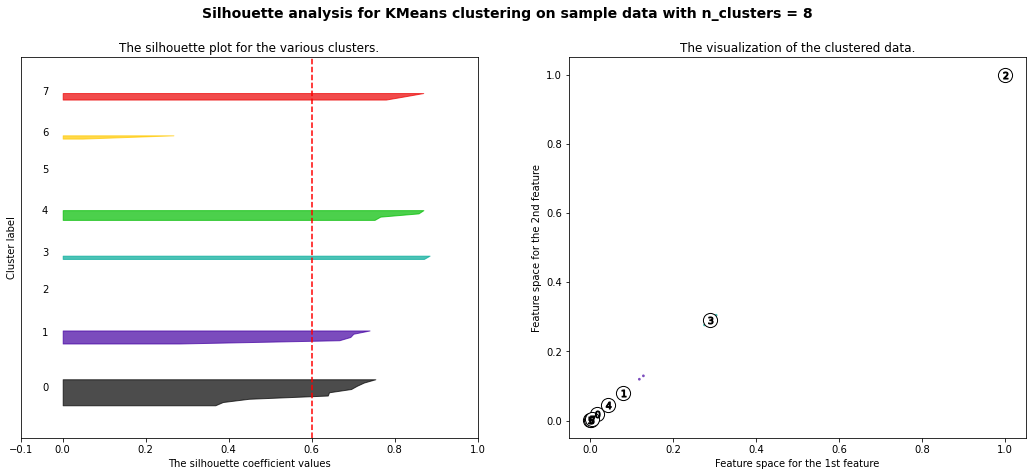

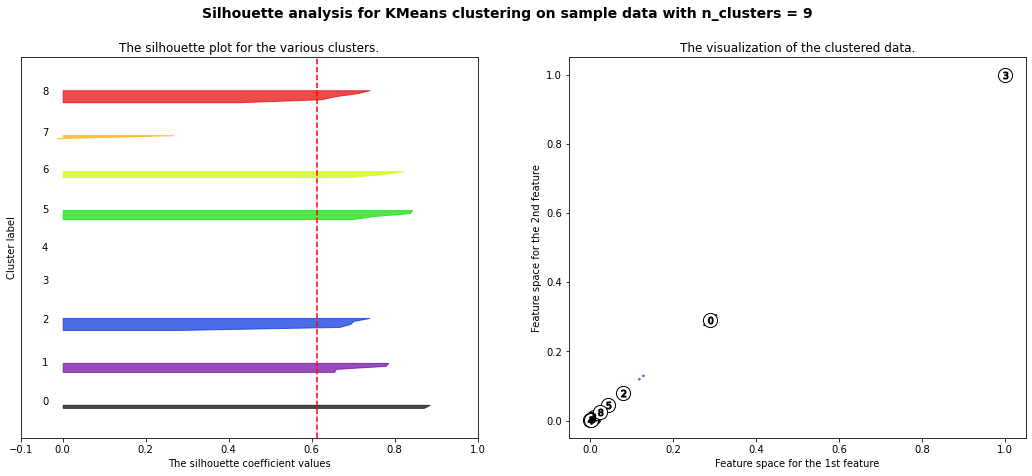

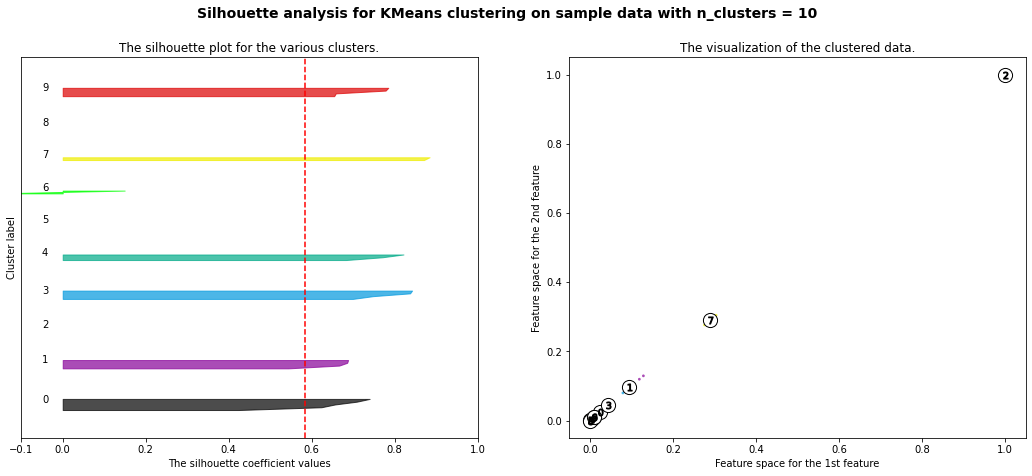

In [ ]:
#from silhoutte import silhoutte_analysis
silhoutte_analysis(sc,list(range(2,11)))

Based on elbow method and silhoutte analysis above, we can choose cluster = 5

In [ ]:
cluster_model = cluster.KMeans(n_clusters=5, random_state=3)
cluster_label = cluster_model.fit_predict(sc)
df_cluster['cluster'] = cluster_label
df_cluster

,total_order,total_customer,payment_installments,payment_value,cluster
customer_state,,,,,
AC,71,71,3.0,139.530,0
AL,365,365,2.0,124.050,2
AM,138,138,2.0,101.295,4
AP,63,63,2.0,135.610,2
BA,3265,3265,2.0,101.310,4
CE,1222,1222,2.0,115.885,2
DF,2023,2023,1.0,100.340,1
ES,1982,1982,2.0,99.660,4
GO,1926,1926,2.0,100.820,4


In [ ]:
df_cluster.groupby(['cluster'])['total_order'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1,71.000000,71.0,71,71
1,6,2761.000000,2741.0,5266,269
2,13,581.846154,460.0,1548,36
3,1,40539.000000,40539.0,40539,40539
4,6,5149.833333,2623.5,12361,138


- **Cluster 0** : Low total order
- **Cluster 1** : Medium total order
- **Cluster 2** : Low-medium total order
- **Cluster 3** : High total order
- **Cluster 4** : Medium total order

In [ ]:
df_cluster.groupby(['cluster'])['total_customer'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1,71.000000,71.0,71,71
1,6,2761.000000,2741.0,5266,269
2,13,581.846154,460.0,1548,36
3,1,40539.000000,40539.0,40539,40539
4,6,5149.833333,2623.5,12361,138


- **Cluster 0** : Low total customer
- **Cluster 1** : Medium total customer
- **Cluster 2** : Low-medium total customer
- **Cluster 3** : High total total customer
- **Cluster 4** : Medium total total customer

In [ ]:
df_cluster.groupby(['cluster'])['payment_installments'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1,3.000000,3.0,3.0,3.0
1,6,1.000000,1.0,1.0,1.0
2,13,1.961538,2.0,2.0,1.5
3,1,1.000000,1.0,1.0,1.0
4,6,2.000000,2.0,2.0,2.0


- **Cluster 0** : Tend to make 3 installments
- **Cluster 1** : Tend to make 1 installment
- **Cluster 2** : Tend to make 2 installments
- **Cluster 3** : Tend to make 1 installment
- **Cluster 4** : Tend to make 2 installments

In [ ]:
df_cluster.groupby(['cluster'])['payment_value'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1,139.530000,139.530,139.53,139.53
1,6,103.198333,100.290,118.28,94.30
2,13,121.984231,121.455,135.61,112.87
3,1,85.370000,85.370,85.37,85.37
4,6,100.432500,100.505,101.31,99.32


- **Cluster 0** : High value customer
- **Cluster 1** : Moderate value customer
- **Cluster 2** : High value customer
- **Cluster 3** : Low value customer
- **Cluster 4** : Moderate value customer

###**Summary** <br>
> **Cluster 0** :
- Have low total order and customer
- Tend to make 3 installment payments
- High value customer

> **Cluster 1** :
- Have medium total order and customer
- Tend to make full payment
- Moderate value customer

> **Cluster 2** : 
- Have low-medium total order and customer
- Tend to make 2 installment payments
- High value customer

> **Cluster 3** :
- Have high total order and customer
- Tend to make full payment
- Low value customer

> **Cluster 4** : 
- Have medium total order and customer
- Tend to make 2 installment payments
- Moderate value customer

 ### **Recommendation**<br>
> **Cluster 0** :
- Provide referral programs to increase the number of consumers.
- Give discounts for high value purchases to increase number of order.
- Give special promo for full payment.

> **Cluster 1** :
- Give a voucher for customer that posted review on social media to get a feedback what to improve in our service or product.

> **Cluster 2** : 
- Provide referral programs to increase the number of consumers.
- Give discounts for bundles purchases.
- Give special promo for full payment.

> **Cluster 3** :
- Offering deals for bundles purchases.

> **Cluster 4** : 
- Provide referral programs to increase the number of consumers.
- Give special promo for full payment.